# $\mathit{l}_k$ _norm_ sample code and conclusion

The $\mathit{l}_k$ _norm_ is one of the performance measures for regression tasks

$\mathit{l}_k$ _norm_ = $\left( \sum_{i=1}^m |h\left(\vec{x}^{(i)}\right) - y^{(i)}|^k \right)^{\frac{1}{k}}$

## Notations
- _h_ stands for _hypothesis_. It is well-known as _function_, _model_, _system_, _etc._ that we designed
- _m_ is the total quantity of instances in the dataset for us to train the model/hypothesis
- $\vec{x}^{(i)}$ is a vertical vector. It is the $i^{th}$ instance of the dataset. It includes all the feature values/attributes of the inputs of the dataset, but no _label_/output
- $y^{(i)}$ is the corresponding label, the output value in the dataset of the $i^{th}$ instance

## Code explained
- Generate random errors with and without outliers respectively. Error is the difference between predictions $\mathit{h}\left(\vec{x}^{(i)}\right)$ and the target value $y^{(i)}$
- Repeat part of the random errors without outliers, then fill in some outliers
- Use two ways to calculate $\mathit{l}_k$ _norm_
    - The function from Numpy, use as the reference to check my own code
    - My own code based on the definition of $\mathit{l}_k$ _norm_
- With different _k_, calculate the standard deviation of norms to show the sensitivity
- With different _k_, normalize the norms with and without outliers to show the sensitivity
- Plot both the normalized norms and the errors' distribution

The standard deviation of error from data without outliers 1.8163963606345461
The standard deviation of error from data with outliers 9.039762227458821


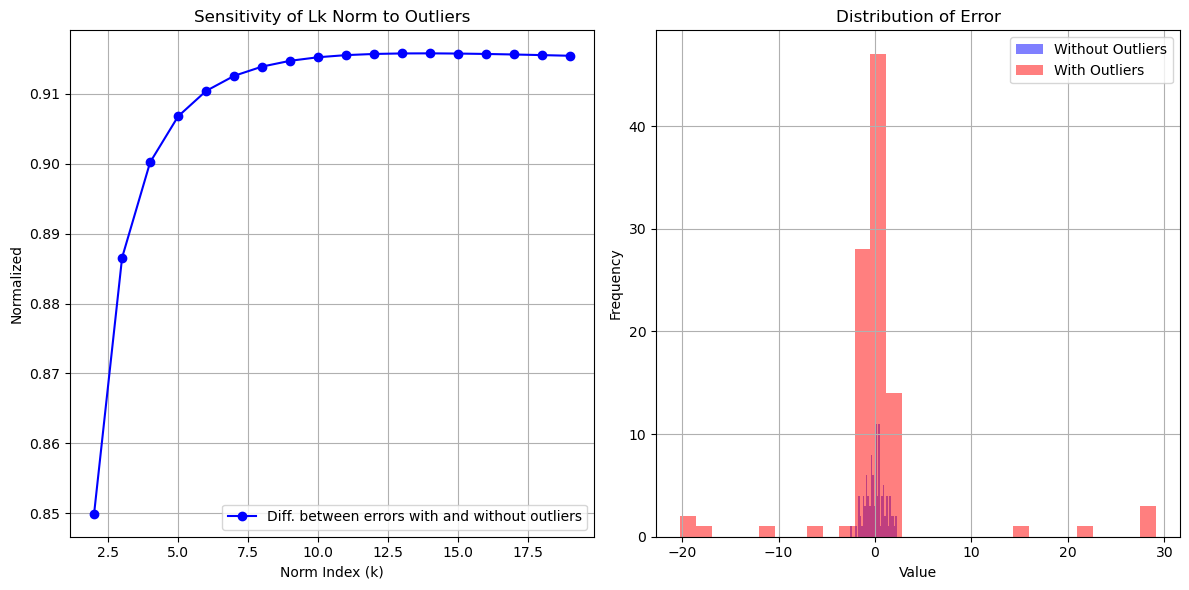

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def compute_lk_norm(data, k):
    # Compute the Lk norm
    return np.linalg.norm(data, ord=k)

# Generate sample data, one with outliers, one without

np.random.seed(0)
n_samples = 100
n_outliers = 10 
outliers_scale = 15

# Generate 100 values without outliers
error_without_outliers = np.random.normal(loc=0, scale=1, size=n_samples)
    
# Repeat part of values that without outliers
error_with_outliers = error_without_outliers[ 0 : (n_samples-n_outliers) ]
# Continue to generate n_outliers datasets with outliers, then merge to the matrix
error_with_outliers = np.append(error_with_outliers, np.random.normal(loc=0, scale=outliers_scale, size=n_outliers))

# Values of k
k_values = np.arange(2, 20) # = 1 -> MAE; =2 -> RMSE

# Compute norms for different k values

# # Use Lk norm function in Numpy
# norms_without_outliers = [compute_lk_norm(data_without_outliers, k) for k in k_values]
# norms_with_outliers = [compute_lk_norm(data_with_outliers, k) for k in k_values]

# Use Lk Norm definition
norms_without_outliers =  [np.power(   np.sum( np.power( np.abs(error_without_outliers), k) ), (1/k) ) for k in k_values ] 
norms_with_outliers =  [np.power(   np.sum( np.power( np.abs(error_with_outliers), k) ), (1/k) ) for k in k_values ]

# Calculate standard deviations
std_without_outliers = np.std(norms_without_outliers, ddof=1)  # ddof=1 for sample standard deviation
std_with_outliers = np.std(norms_with_outliers, ddof=1)
print('The standard deviation of error from data without outliers', std_without_outliers)
print('The standard deviation of error from data with outliers',std_with_outliers)

# Normalized difference between errors with and without outliers
Normalized_diff = (np.array(norms_with_outliers) - np.array(norms_without_outliers) ) / np.array(norms_with_outliers)

plt.figure(figsize=(12, 6))

# Plot Lk Norms
plt.subplot(1, 2, 1)
plt.plot(k_values, Normalized_diff, marker='o', linestyle='-', color='b', label='Diff. between errors with and without outliers')
plt.xlabel('Norm Index (k)')
plt.ylabel('Normalized')
plt.title('Sensitivity of Lk Norm to Outliers')
plt.legend()
plt.grid(True)

# Plot Distributions
plt.subplot(1, 2, 2)
plt.hist(error_without_outliers, bins=30, alpha=0.5, color='b', label='Without Outliers')
plt.hist(error_with_outliers, bins=30, alpha=0.5, color='r', label='With Outliers')
plt.xlabel('Error Value')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Conclusion
The higher the norm index, the more it sensitive to outliers